In [15]:
import re
from pathlib import Path
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

# path_log="/home/avila/pangeblocks/output/logs/Cluster_6892-rule-pangeblock.err.log"

def time_from_log(path_log):
    with open(path_log, "r") as fp:
        lines=fp.readlines()

    # pattern 
    pattern_secs = r'\d+\.\d+'
    sys_time=None
    user_time=None
    for line in lines:
        if "User time (seconds)" in line:
            res = re.search(pattern_secs, line)
            user_time = float(res.group(0))
        elif "System time (seconds)" in line:
            res = re.search(pattern_secs, line)
            sys_time = float(res.group(0))

    name_msa, _, rule = Path(path_log).stem.split("-")

    return dict(
        name_msa=name_msa, 
        rule=Path(rule).stem ,
        sys_time=sys_time if sys_time else None,
        user_time=user_time if user_time else None,
    )

In [16]:
info_sys_time=defaultdict(dict)
info_user_time=defaultdict(dict)
logs = Path("../output/logs").rglob("*.err.log")
for log in logs:
    name_msa, rule, sys_time, user_time= time_from_log(log).values()
    info_sys_time[name_msa].update({rule:sys_time})
    info_user_time[name_msa].update({rule:user_time})

Text(0.5, 1.0, 'Pangeblocks: Distribution of sys_time per MSA')

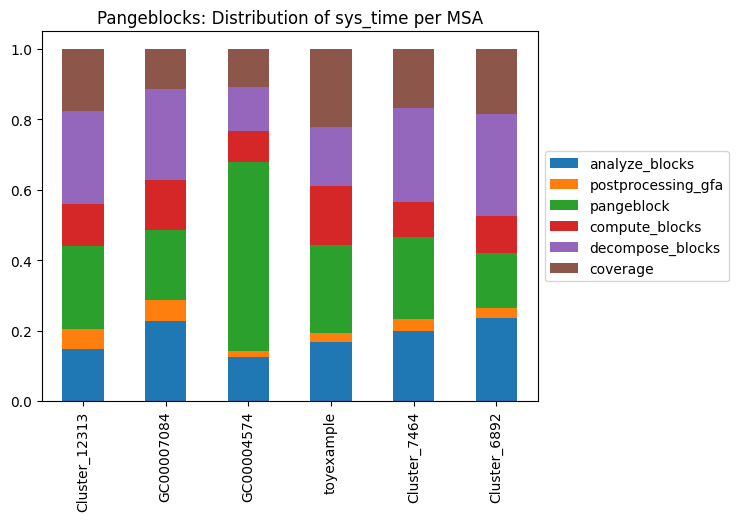

In [20]:
# plot sys time
sys_time_df = pd.DataFrame.from_dict(info_sys_time).T
norm_times_df=sys_time_df.div(sys_time_df.sum(axis=1),axis=0)
norm_times_df.plot(kind="bar", stacked=True)
plt.legend(loc="center right", bbox_to_anchor=(1.4,0.5))
plt.title("Pangeblocks: Distribution of sys_time per MSA")

Text(0.5, 1.0, 'Pangeblocks: Distribution of user_time per MSA')

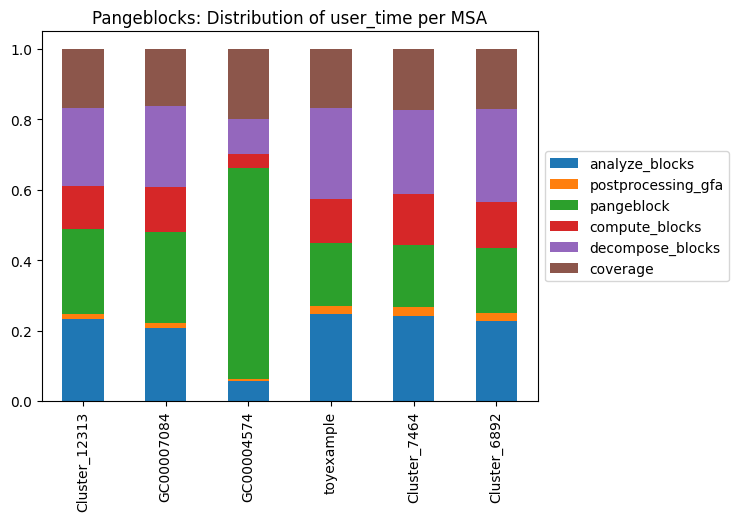

In [22]:
# plot user time
user_time_df = pd.DataFrame.from_dict(info_user_time).T
norm_user_time_df=user_time_df.div(user_time_df.sum(axis=1),axis=0)
norm_user_time_df.plot(kind="bar", stacked=True)
plt.legend(loc="center right", bbox_to_anchor=(1.4,0.5))
plt.title("Pangeblocks: Distribution of user_time per MSA")